In [ ]:

#importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance = pd.read_csv('insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,22,female,25.2,0,yes,northwest,1522.890
1,19,male,30.4,1,no,southeast,1825.453
2,31,male,30.0,3,no,southwest,3886.742
3,38,male,29.8,0,no,northwest,53241.960
4,33,male,25.0,0,no,southwest,2466.330


In [4]:
#Last 5 rows of the dataframe
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,55,male,33.60,3,no,northwest,12005.90
1334,25,female,28.90,0,no,northeast,3345.84
1335,19,female,39.50,0,no,southeast,2906.53
1336,25,female,26.07,0,no,southeast,3005.90
1337,55,female,38.90,0,yes,northwest,35414.88


In [5]:
# number of rows and columns
insurance.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
Categorical Features:

    Sex
    Smoker
    Region



In [7]:
# checking for missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance.duplicated().sum()

1

In [9]:
insurance=insurance.drop_duplicates()
insurance

,age,sex,bmi,children,smoker,region,charges
0,22,female,25.20,0,yes,northwest,1522.890
1,19,male,30.40,1,no,southeast,1825.453
2,31,male,30.00,3,no,southwest,3886.742
3,38,male,29.80,0,no,northwest,53241.960
4,33,male,25.00,0,no,southwest,2466.330
...,...,...,...,...,...,...,...
1333,55,male,33.60,3,no,northwest,12005.900
1334,25,female,28.90,0,no,northeast,3345.840
1335,19,female,39.50,0,no,southeast,2906.530
1336,25,female,26.07,0,no,southeast,3005.900


In [10]:
insurance.duplicated().sum()

0

In [ ]:
#Data Analysis

In [12]:
# statistical Measures of the dataset
insurance.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.250561,30.669813,1.095737,13304.737022
std,14.013762,6.106464,1.205571,12167.858774
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.770000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\SANKET\AppData\Local\Temp\ipykernel_22688\3883278126.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])
C:\Users\SANKET\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


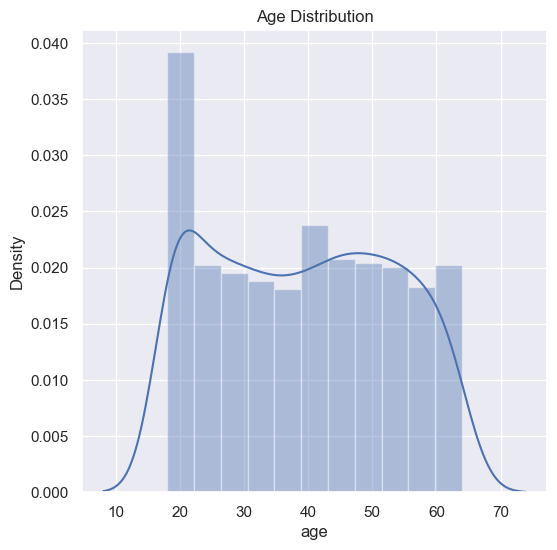

In [13]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['age'])
plt.title('Age Distribution')
plt.show()

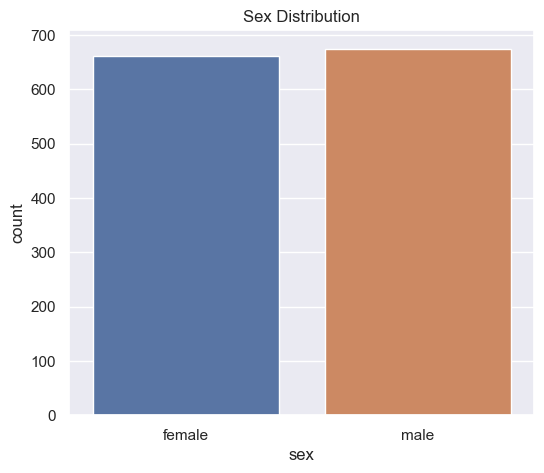

In [14]:
# Gender column
plt.figure(figsize=(6,5))
sns.countplot(x='sex', data=insurance)
plt.title('Sex Distribution')
plt.show()

In [15]:
insurance['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

C:\Users\SANKET\AppData\Local\Temp\ipykernel_22688\2447646848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])
C:\Users\SANKET\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


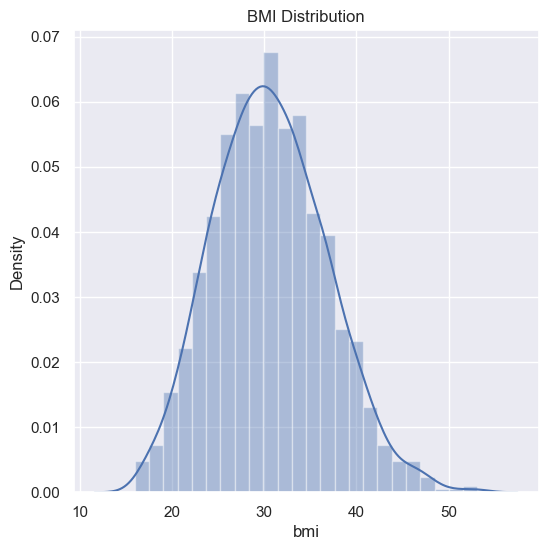

In [16]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi'])
plt.title('BMI Distribution')
plt.show()

In [ ]:
Normal BMI Range --> 18.5 to 24.9

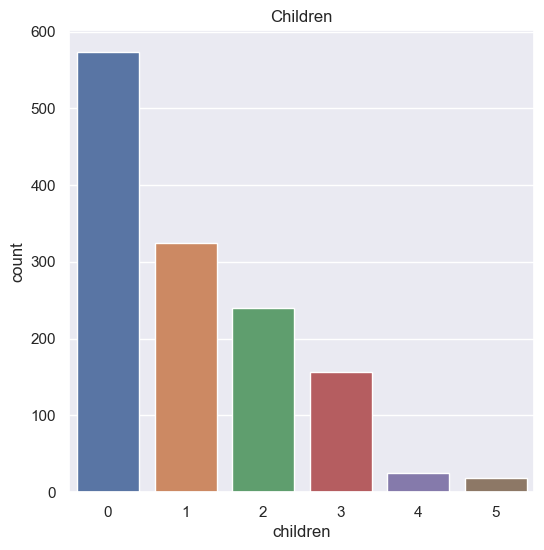

In [17]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance)
plt.title('Children')
plt.show()

In [18]:
insurance['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

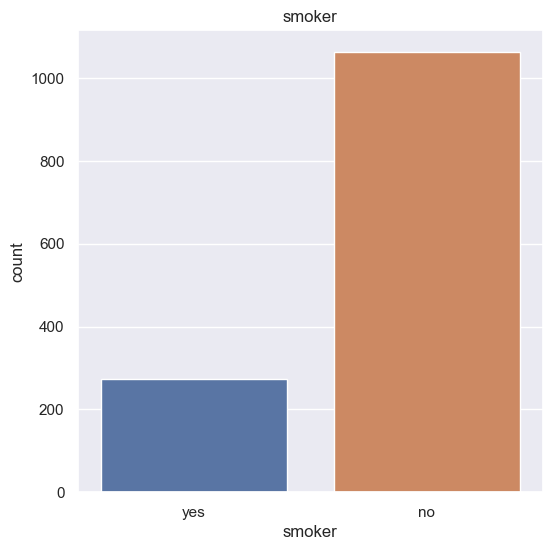

In [19]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance)
plt.title('smoker')
plt.show()

In [20]:
insurance['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

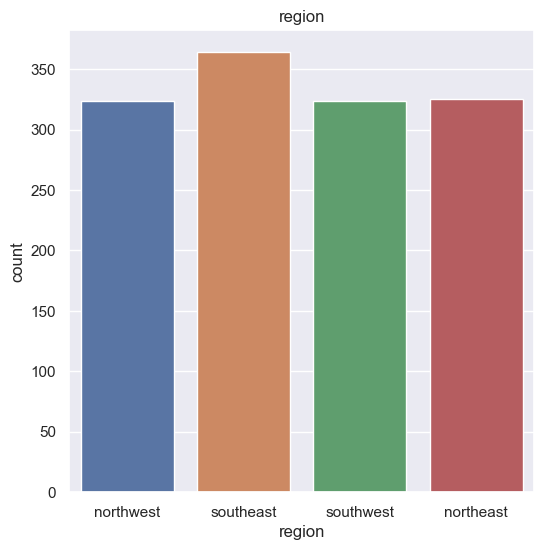

In [21]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance)
plt.title('region')
plt.show()

In [22]:
insurance['region'].value_counts()

region
southeast    364
northeast    325
northwest    324
southwest    324
Name: count, dtype: int64

C:\Users\SANKET\AppData\Local\Temp\ipykernel_22688\3288506564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])
C:\Users\SANKET\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


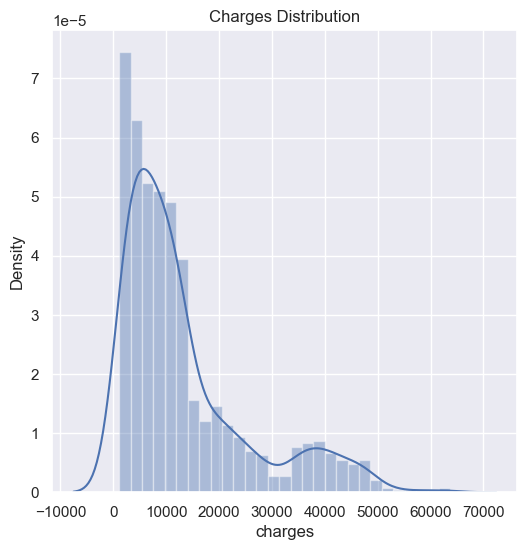

In [23]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.title('Charges Distribution')
plt.show()

In [ ]:
#Data Preprocessing 

In [ ]:
(Encoding a categorical features)

In [24]:
# encoding sex column
insurance.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
#Splitting the features and target

In [25]:
X = insurance.drop(columns='charges', axis=1)
Y = insurance['charges']

In [26]:
print(X)

      age  sex    bmi  children  smoker  region
0      22    1  25.20         0       0       3
1      19    0  30.40         1       1       0
2      31    0  30.00         3       1       1
3      38    0  29.80         0       1       3
4      33    0  25.00         0       1       1
...   ...  ...    ...       ...     ...     ...
1333   55    0  33.60         3       1       3
1334   25    1  28.90         0       1       2
1335   19    1  39.50         0       1       0
1336   25    1  26.07         0       1       0
1337   55    1  38.90         0       0       3

[1337 rows x 6 columns]


In [27]:
print(Y)

0        1522.890
1        1825.453
2        3886.742
3       53241.960
4        2466.330
          ...    
1333    12005.900
1334     3345.840
1335     2906.530
1336     3005.900
1337    35414.880
Name: charges, Length: 1337, dtype: float64


In [ ]:
#Splitting the data into Training data & Testing Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [ ]:
#Model Training 

In [ ]:
#Linear Regression

In [30]:
# loading the Linear Regression model
regressor = LinearRegression()

In [31]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Model Evaluation

In [32]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [78]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7484996207241856


In [33]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [34]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7153995044570657


In [ ]:
#Building a predictive System

In [35]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3862.19888378]
The insurance cost is USD  3862.198883780504


C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
